This notebook is made to test the different learning strategy 

# CQL and IQL

In [65]:
from multi_agent_frozen  import FrozenLakeFlexibleAgentsEnv
from IQL_CQL import test_independent_q_learning,test_centralized_learning

### seed 7  
        A . . . . 
        . H . H .
        . . . . .
        . H . H .
        G . H . A

### seed 8 
        A . . . .
        . H . . .
        . . . . .
        H . H . H
        G . H . A

In [66]:
n_agents = 2

# Environment setup
env = FrozenLakeFlexibleAgentsEnv(
    num_agents=n_agents, 
    grid_size=(5, 5), 
    slip_prob=0.0, 
    hole_prob=0.2, 
    seed=8, 
    collaboration_bonus=1.0
)
env.render()
env.reset()


A . . . .
. H . . .
. . . . .
H . H . H
G . H . A



((0, 24), {})

In [67]:
import numpy as np
import time
import os

def visualize_policy_iql_with_images(env, iql, num_episodes=2, max_steps=20, use_pygame=True, 
                                   save_images=False, output_dir="frames"):
    """
    Visualize the learned policy for IQL agents and optionally save each frame
    
    Parameters:
    -----------
    env : FrozenLakeFlexibleAgentsEnvCol
        The environment to visualize
    iql : IndependentQLearning
        The trained IQL with agents having q_tables
    num_episodes : int
        Number of episodes to run
    max_steps : int
        Maximum steps per episode
    use_pygame : bool
        Whether to use pygame for visualization
    save_images : bool
        Whether to save images of each step
    output_dir : str
        Directory to save images (will be created if it doesn't exist)
    """
    # Action names for better visualization
    action_names = {0: "LEFT", 1: "DOWN", 2: "RIGHT", 3: "UP"}
    
    # Create output directory if needed
    if save_images:
        os.makedirs(output_dir, exist_ok=True)
    
    for episode in range(num_episodes):
        state, _ = env.reset()
        
        # Convert to list of done flags
        done = [False] * env.num_agents
        all_done = False
        
        truncated = [False] * env.num_agents
        total_reward = [0] * env.num_agents
        steps = 0
        
        print(f"\n=== Test Episode {episode+1} ===")
        
        # Render initial state
        if use_pygame:
            if save_images:
                save_path = os.path.join(output_dir, f"episode_{episode+1}_step_0.png")
                env.render_pygame(save_path=save_path)
            else:
                env.render_pygame()
        else:
            print("Initial state:")
            env.render()
        
        while not all_done and not any(truncated) and steps < max_steps:
            # Get best action from each agent's Q-table
            actions = []
            for i, agent in enumerate(iql.agents):
                agent_state = state[i]  # Get state for this agent
                actions.append(agent.get_best_action(agent_state) if hasattr(agent, 'get_best_action') 
                              else np.argmax(agent.q_table[agent_state]))
            
            # Take action
            next_state, rewards, done, truncated, info = env.step(actions)
            
            # Check for collisions
            collision = info.get("collisions", False)
            collision_agents = info.get("collision_agents", [])
            
            # Update state and reward
            state = next_state
            for a in range(env.num_agents):
                total_reward[a] += rewards[a]
            steps += 1
            
            # Determine if all agents are done
            all_done = all(done)
            
            # Render with action information
            print(f"Step {steps}:")
            for a in range(env.num_agents):
                print(f"Agent {a+1}: {action_names[actions[a]]}, Reward: {rewards[a]:.2f}, Total: {total_reward[a]:.2f}")
                
            if collision:
                print("/!\\ Collision detected! Agents {0} are on the same tile. /!\\ ".format(
                    ", ".join([str(a+1) for a in collision_agents])
                ))
            
            if use_pygame:
                if save_images:
                    save_path = os.path.join(output_dir, f"episode_{episode+1}_step_{steps}.png")
                    env.render_pygame(save_path=save_path)
                else:
                    env.render_pygame()
                time.sleep(0.5)
            else:
                env.render()
                time.sleep(0.5)
        
        print(f"Episode finished after {steps} steps")
        print(f"Total rewards: {[round(r, 2) for r in total_reward]}")
        
        # Check goal achievement
        if any(env.reached_goal):
            goal_agents = [i+1 for i, reached in enumerate(env.reached_goal) if reached]
            print(f"Success! Agents {goal_agents} reached the goal.")
        else:
            print("Failed. No agent reached the goal.")
        
        # Short pause between episodes
        time.sleep(1)

    try:
        env.close()
    except:
        print("Note: Error while closing environment")
    
    # Ensure pygame is properly closed
    try:
        import pygame
        pygame.quit()
    except:
        pass
    
    if save_images:
        print(f"Images saved to {output_dir} directory")

def get_best_action(self, state):
    """Return the best action for a state based on the Q-table"""
    return np.argmax(self.q_table[state])
# Helper function to add to your QAgent class if needed
def get_best_action(self, state):
    """Return the best action for a state based on the Q-table"""
    return np.argmax(self.q_table[state])

Environnement initial:
A . . . .
. H . . .
. . . . .
H . H . H
G . H . A


Début de l'entraînement centralisé...


Épisode 10000/100000, Récompenses moyennes agents: ['0.00', '0.00'], Epsilon: 0.9608


Épisode 20000/100000, Récompenses moyennes agents: ['0.02', '0.00'], Epsilon: 0.9231


Épisode 30000/100000, Récompenses moyennes agents: ['0.05', '0.00'], Epsilon: 0.8869


Épisode 40000/100000, Récompenses moyennes agents: ['0.02', '0.00'], Epsilon: 0.8521


Exception ignored in: <function tqdm.__del__ at 0x000001D1F1E4FAF0>
Traceback (most recent call last):
  File "c:\Users\HP\side project ml\MARL\MARL-project\marlenv\lib\site-packages\tqdm\std.py", line 1148, in __del__
    self.close()
  File "c:\Users\HP\side project ml\MARL\MARL-project\marlenv\lib\site-packages\tqdm\std.py", line 1277, in close
    if self.last_print_t < self.start_t + self.delay:
AttributeError: 'tqdm' object has no attribute 'last_print_t'


Épisode 50000/100000, Récompenses moyennes agents: ['0.06', '0.00'], Epsilon: 0.8187


Épisode 60000/100000, Récompenses moyennes agents: ['0.03', '0.00'], Epsilon: 0.7866


Épisode 70000/100000, Récompenses moyennes agents: ['0.10', '0.00'], Epsilon: 0.7558


Épisode 80000/100000, Récompenses moyennes agents: ['0.04', '0.00'], Epsilon: 0.7261


Épisode 90000/100000, Récompenses moyennes agents: ['0.16', '0.00'], Epsilon: 0.6977


100%|██████████| 100000/100000 [01:00<00:00, 1647.87it/s][A


Épisode 100000/100000, Récompenses moyennes agents: ['0.09', '0.01'], Epsilon: 0.6703

Politique centralisée apprise:
Politique centralisée:
Nombre d'états visités: 511
Nombre d'entrées Q non nulles: 3034
Valeur Q moyenne: 0.2837
Valeur Q maximale: 1.0000
Valeur Q minimale (non-nulle): 0.0018


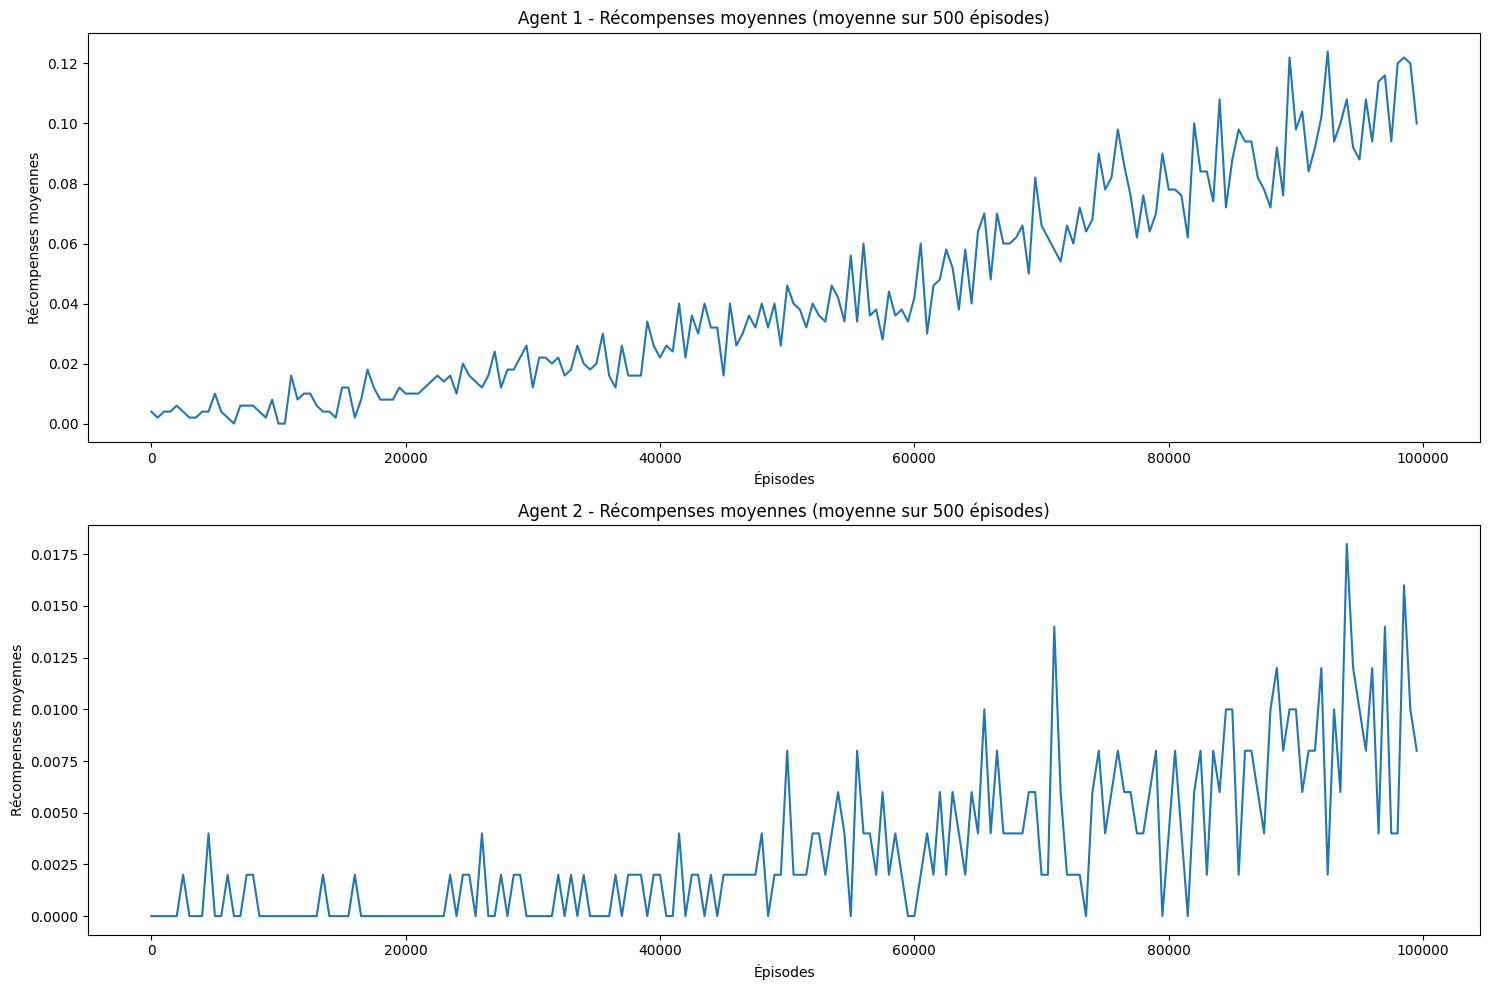

Test de la politique obtenue

Évaluation de la politique sur 1000 épisodes...

Résultats de l'évaluation:
Agent 1:
  - Taux de réussite: 100.00%
  - Nombre moyen d'étapes (succès): 6.00
  - Récompense moyenne: 1.0000
Agent 2:
  - Taux de réussite: 0.00%
  - Nombre moyen d'étapes (succès): N/A (aucun succès)
  - Récompense moyenne: 0.0000

Taux de collaboration: 0.00%

Tous les résultats ont été sauvegardés dans le dossier 'results', avec le fichier principal: results/centralized_learning_20250322_190920.txt


In [68]:
env.reset()
learning_rate_cql = 0.5
max_episodes_cql = 100000
discount_factor_cql = 0.99
exploration_rate_cql = 1.0
min_exploration_rate_cql = 0.05
exploration_decay_cql = 0.999996
window_size_cql = int(max_episodes_cql/200)

# Run centralized Q-learning
cql, cql_results = test_centralized_learning(
    env=env,
    n_agents=n_agents,
    learning_rate=learning_rate_cql,
    discount_factor=discount_factor_cql,
    exploration_rate=exploration_rate_cql,
    min_exploration_rate=min_exploration_rate_cql,
    exploration_decay=exploration_decay_cql,
    max_episodes=max_episodes_cql,
    window_size=window_size_cql
)

Environnement initial:
A . . . .
. H . . .
. . . . .
H . H . H
G . H . A


Début de l'entraînement indépendant...


 10%|█         | 10383/100000 [00:04<00:41, 2160.28it/s]

Épisode 10000/100000, Récompenses moyennes agents: ['0.12', '0.03'], Epsilon: 0.7408


 20%|██        | 20171/100000 [00:12<01:24, 943.50it/s] 

Épisode 20000/100000, Récompenses moyennes agents: ['0.14', '0.05'], Epsilon: 0.5488


 30%|███       | 30207/100000 [00:20<00:41, 1689.38it/s]

Épisode 30000/100000, Récompenses moyennes agents: ['0.37', '0.02'], Epsilon: 0.4066


 40%|████      | 40269/100000 [00:27<00:34, 1754.38it/s]

Épisode 40000/100000, Récompenses moyennes agents: ['0.53', '0.31'], Epsilon: 0.3012


 50%|█████     | 50203/100000 [00:33<00:30, 1633.75it/s]

Épisode 50000/100000, Récompenses moyennes agents: ['0.68', '0.45'], Epsilon: 0.2231


 60%|██████    | 60126/100000 [00:39<00:28, 1385.87it/s]

Épisode 60000/100000, Récompenses moyennes agents: ['0.66', '0.59'], Epsilon: 0.1653


 70%|███████   | 70332/100000 [00:45<00:16, 1754.73it/s]

Épisode 70000/100000, Récompenses moyennes agents: ['0.77', '0.55'], Epsilon: 0.1225


 80%|████████  | 80365/100000 [00:51<00:09, 1996.66it/s]

Épisode 80000/100000, Récompenses moyennes agents: ['0.85', '0.85'], Epsilon: 0.0907


 90%|█████████ | 90184/100000 [00:58<00:05, 1798.99it/s]

Épisode 90000/100000, Récompenses moyennes agents: ['0.97', '0.87'], Epsilon: 0.0672


100%|██████████| 100000/100000 [01:03<00:00, 1570.42it/s]


Épisode 100000/100000, Récompenses moyennes agents: ['0.97', '0.94'], Epsilon: 0.0498

Politiques indépendantes apprises:

Politique de l'agent 1:
 ↓  →  ↓  ↓  ↓ 
 ↓  o  ↓  ↓  ↓ 
 →  ↓  ←  →  ← 
 o  ↓  o  ↑  o 
 o  ←  o  ↑  ↓ 

Politique de l'agent 2:
 ↓  ←  ↓  ←  ↓ 
 ↓  o  ↓  ←  ← 
 →  ↓  ←  ←  ← 
 o  ↓  o  ↑  o 
 o  ←  o  ↑  ← 


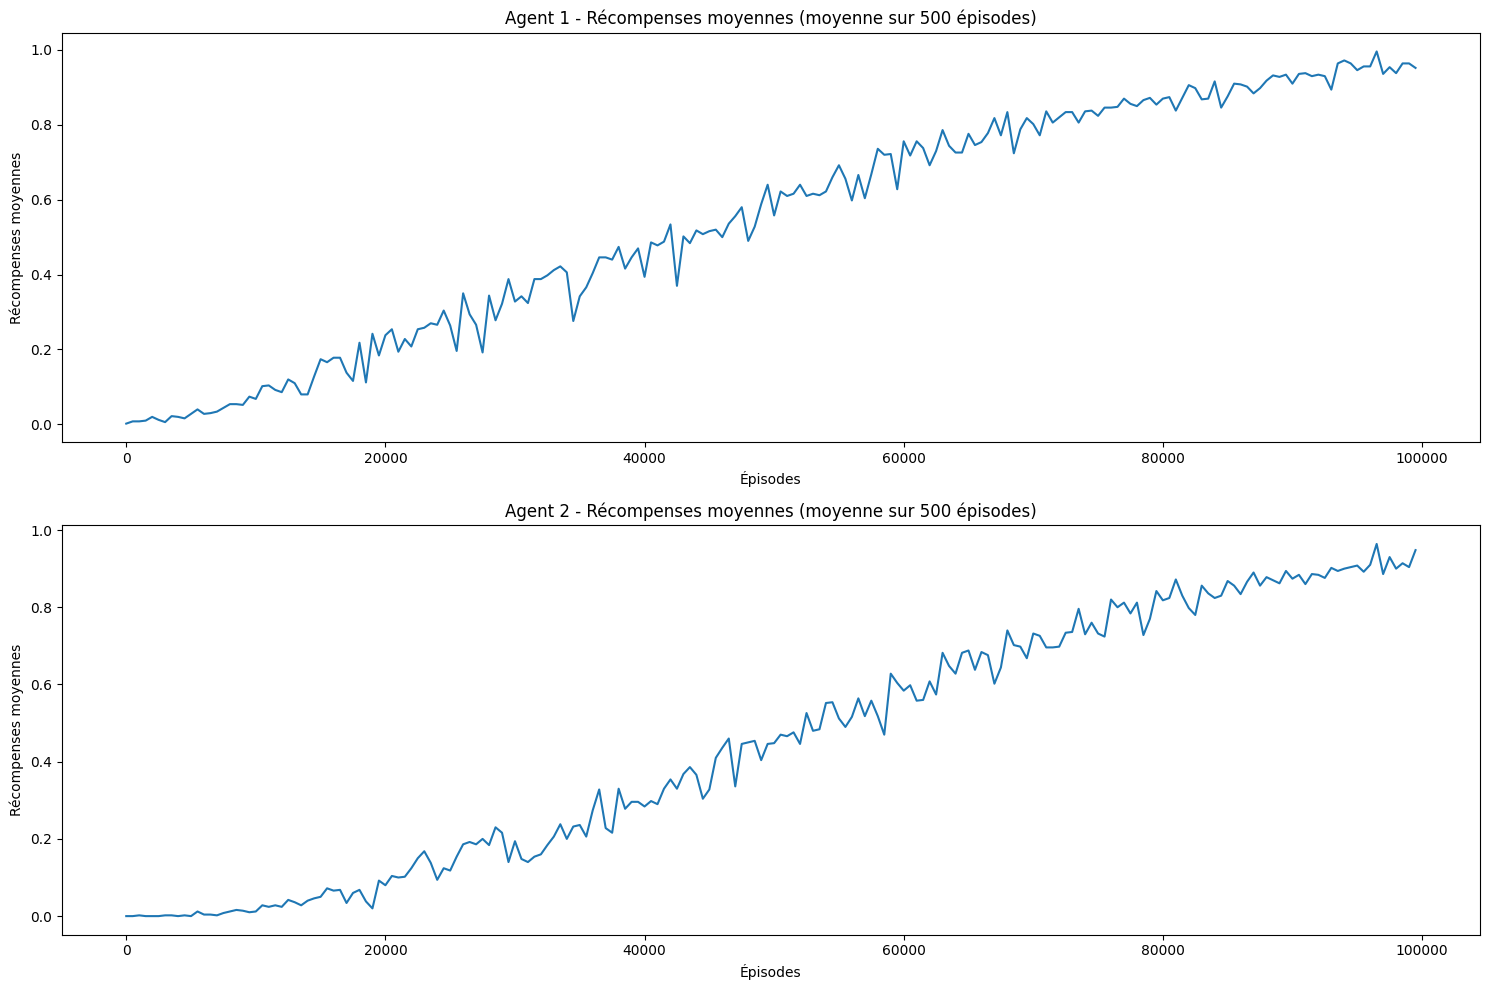

Test de la politique obtenue - Récompenses uniquement
Agent 1: Récompense moyenne = 0.0000 ± 0.0000
Agent 2: Récompense moyenne = 0.0000 ± 0.0000

Tous les résultats ont été sauvegardés dans le dossier 'results', avec le fichier principal: results/independent_q_learning_20250322_191045.txt


In [71]:
env.reset()

# Independent Q-learning parameters
learning_rate_iql = 0.5
max_episodes_iql = 100000
discount_factor_iql = 0.99
exploration_rate_iql = 1.0
min_exploration_rate_iql = 0.0
exploration_decay_iql = 0.99997
window_size_iql = int(max_episodes_iql/200)

# Run independent Q-learning
iql, iql_results = test_independent_q_learning(
    env=env,
    n_agents=n_agents,
    learning_rate=learning_rate_iql,
    discount_factor=discount_factor_iql,
    exploration_rate=exploration_rate_iql,
    min_exploration_rate=min_exploration_rate_iql,
    exploration_decay=exploration_decay_iql,
    max_episodes=max_episodes_iql,
    window_size=window_size_iql,
)


In [72]:
# visualize_policy_iql_with_images(env,iql,2,max_steps=30) # attention ait crasher le notebook


## add alternating learning rates to see if the stationnariyt problem 


In [73]:
from IQL_CQL import test_alternating_learning

Environnement initial:
A . . . .
. H . . .
. . . . .
H . H . H
G . H . A


Début de l'entraînement avec alternance...


 11%|█         | 5453/50000 [00:02<00:17, 2501.66it/s]

Épisode 5000/50000, Récompenses moyennes agents: ['0.05', '0.00'], Agent actif: 1, Taux d'apprentissage: ['0.0400', '0.4000']Epsilon: 0.779total _reward: 0.0500


 21%|██        | 10394/50000 [00:04<00:14, 2653.97it/s]

Épisode 10000/50000, Récompenses moyennes agents: ['0.08', '0.06'], Agent actif: 0, Taux d'apprentissage: ['0.4000', '0.0400']Epsilon: 0.607total _reward: 0.1400


 31%|███       | 15370/50000 [00:06<00:13, 2663.56it/s]

Épisode 15000/50000, Récompenses moyennes agents: ['0.25', '0.25'], Agent actif: 1, Taux d'apprentissage: ['0.0400', '0.4000']Epsilon: 0.472total _reward: 0.5000


 40%|████      | 20228/50000 [00:09<00:15, 1909.51it/s]

Épisode 20000/50000, Récompenses moyennes agents: ['0.43', '0.21'], Agent actif: 0, Taux d'apprentissage: ['0.4000', '0.0400']Epsilon: 0.368total _reward: 0.6400


 51%|█████     | 25408/50000 [00:12<00:11, 2096.30it/s]

Épisode 25000/50000, Récompenses moyennes agents: ['0.54', '0.35'], Agent actif: 1, Taux d'apprentissage: ['0.0400', '0.4000']Epsilon: 0.286total _reward: 0.8900


 61%|██████    | 30391/50000 [00:15<00:10, 1904.97it/s]

Épisode 30000/50000, Récompenses moyennes agents: ['0.37', '0.51'], Agent actif: 0, Taux d'apprentissage: ['0.4000', '0.0400']Epsilon: 0.223total _reward: 0.8800


 70%|███████   | 35193/50000 [00:17<00:07, 1986.61it/s]

Épisode 35000/50000, Récompenses moyennes agents: ['0.76', '0.49'], Agent actif: 1, Taux d'apprentissage: ['0.0400', '0.4000']Epsilon: 0.174total _reward: 1.2500


 80%|████████  | 40216/50000 [00:20<00:05, 1908.31it/s]

Épisode 40000/50000, Récompenses moyennes agents: ['0.81', '0.65'], Agent actif: 0, Taux d'apprentissage: ['0.4000', '0.0400']Epsilon: 0.135total _reward: 1.4600


 90%|█████████ | 45208/50000 [00:23<00:03, 1531.55it/s]

Épisode 45000/50000, Récompenses moyennes agents: ['0.90', '0.80'], Agent actif: 1, Taux d'apprentissage: ['0.0400', '0.4000']Epsilon: 0.105total _reward: 1.7000


100%|██████████| 50000/50000 [00:25<00:00, 1937.25it/s]


Épisode 50000/50000, Récompenses moyennes agents: ['0.91', '0.75'], Agent actif: 0, Taux d'apprentissage: ['0.4000', '0.0400']Epsilon: 0.082total _reward: 1.6600

Politique de l'agent 1:
 ↓  →  ↓  ↓  ← 
 ↓  o  ↓  ←  → 
 →  ↓  ←  ←  ← 
 o  ↓  o  ↑  o 
 o  ←  o  ↑  ← 

Politique de l'agent 2:
 ↓  ←  ↓  ↓  ↓ 
 ↓  o  ↓  ←  ← 
 →  ↓  ←  ←  ← 
 o  ↓  o  ↑  o 
 o  ←  o  ↑  ← 


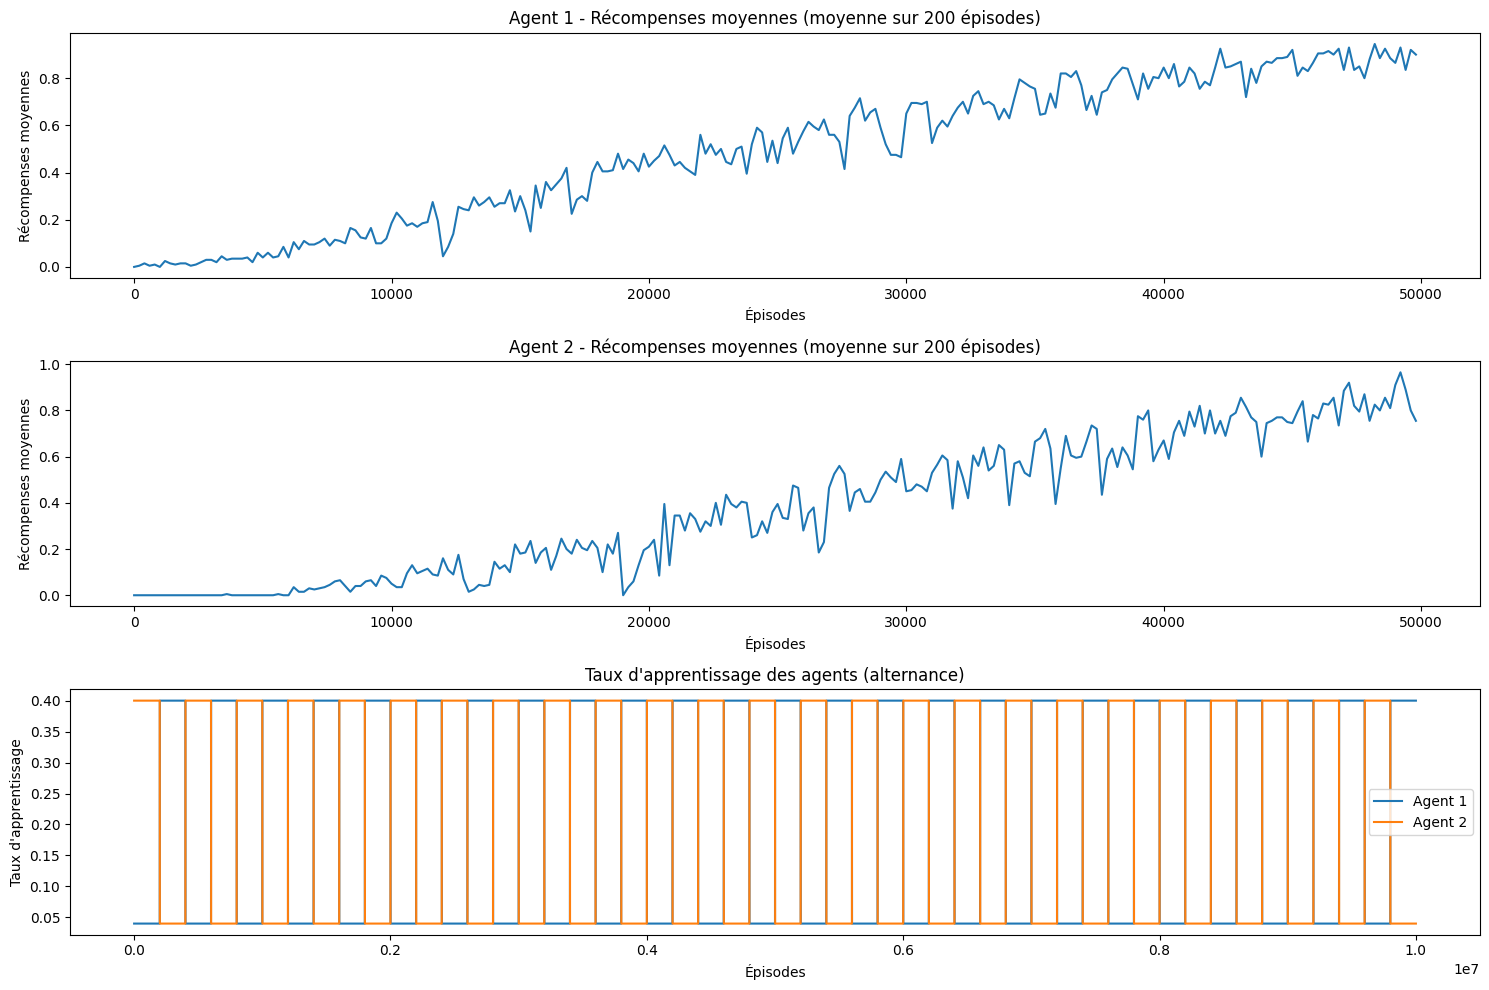

Test de la politique obtenue

Tous les résultats ont été sauvegardés dans le dossier 'results', avec le fichier principal: results/alternating_learning_20250322_191153.txt


In [74]:
env.reset()
alt_agent, alt_results = test_alternating_learning(
    env, n_agents=2,
    base_learning_rate=0.4,
    max_episodes=50000,
    discount_factor=0.99,
    exploration_rate=1.0,
    min_exploration_rate=0.05,
    exploration_decay=0.99995,
    alternating_period=1000,
    learning_rate_ratio=0.1,
    window_size=200
)

In [75]:
# visualize_policy_iql(env,alt_agent,2,max_steps=30)

# collision with agents

In [76]:
from multi_agent_frozen  import FrozenLakeFlexibleAgentsEnvCol


In [77]:
n_agents = 10

# Environment setup
env = FrozenLakeFlexibleAgentsEnvCol(
    num_agents=n_agents, 
    grid_size=(7, 7), 
    slip_prob=0.0, 
    hole_prob=0.3, 
    seed=42, 
    collaboration_bonus=0.0, collision_penalty=0.3
)
env.render()
env.reset()

A H . . . H .
. . H A A . H
. . H H H A H
H A . A . . H
. A A . . H A
. . H . H . .
G H . . . . A



((0, 48, 19, 22, 29, 11, 24, 10, 30, 34), {})

In [ ]:
env.reset()
learning_rate_cql = 0.5
max_episodes_cql = 100000
discount_factor_cql = 0.99
exploration_rate_cql = 1.0
min_exploration_rate_cql = 0.05
exploration_decay_cql = 0.99996
window_size_cql = int(max_episodes_cql/200)

# Run centralized Q-learning
cql, cql_results = test_centralized_learning(
    env=env,
    n_agents=n_agents,
    learning_rate=learning_rate_cql,
    discount_factor=discount_factor_cql,
    exploration_rate=exploration_rate_cql,
    min_exploration_rate=min_exploration_rate_cql,
    exploration_decay=exploration_decay_cql,
    max_episodes=max_episodes_cql,
    window_size=window_size_cql
)

Environnement initial:
A H . . . H .
. . H A A . H
. . H H H A H
H A . A . . H
. A A . . H A
. . H . H . .
G H . . . . A


Début de l'entraînement centralisé...


  0%|          | 478/100000 [02:43<42:36:00,  1.54s/it]

Environnement initial:
A H . . . H .
. . H A A . H
. . H H H A H
H A . A . . H
. A A . . H A
. . H . H . .
G H . . . . A


Début de l'entraînement indépendant...


  0%|          | 43/100000 [00:00<07:56, 209.61it/s]

  5%|▌         | 5042/100000 [00:15<11:17, 140.15it/s]


Évaluation à l'épisode 5000:
Performance actuelle: 1.5000
Meilleure performance précédente: -inf
Nouvelle meilleure politique sauvegardée! Performance: 1.5000


 10%|█         | 10075/100000 [00:28<14:45, 101.55it/s]


Évaluation à l'épisode 10000:
Performance actuelle: 1.5000
Meilleure performance précédente: 1.5000
Épisode 10000/100000, Récompenses moyennes agents: ['-0.01', '-0.06', '-0.01', '-0.14', '0.29', '-0.01', '-0.14', '0.00', '-0.12', '-0.05'], Epsilon: 0.7408


 15%|█▌        | 15055/100000 [00:44<10:11, 139.00it/s]


Évaluation à l'épisode 15000:
Performance actuelle: 0.3000
Meilleure performance précédente: 1.5000


 20%|██        | 20006/100000 [01:00<10:42, 124.41it/s]


Évaluation à l'épisode 20000:
Performance actuelle: 0.4000
Meilleure performance précédente: 1.5000
Épisode 20000/100000, Récompenses moyennes agents: ['-0.01', '-0.06', '0.01', '-0.06', '0.51', '-0.02', '-0.06', '-0.01', '-0.02', '-0.03'], Epsilon: 0.5488


 25%|██▌       | 25058/100000 [01:19<16:44, 74.57it/s] 


Évaluation à l'épisode 25000:
Performance actuelle: 0.2000
Meilleure performance précédente: 1.5000


 30%|███       | 30022/100000 [01:37<16:48, 69.36it/s] 


Évaluation à l'épisode 30000:
Performance actuelle: 0.4000
Meilleure performance précédente: 1.5000
Épisode 30000/100000, Récompenses moyennes agents: ['0.04', '0.09', '0.04', '0.05', '0.71', '-0.01', '0.09', '0.00', '0.29', '-0.01'], Epsilon: 0.4066


 35%|███▌      | 35045/100000 [01:59<09:59, 108.28it/s]


Évaluation à l'épisode 35000:
Performance actuelle: 0.3000
Meilleure performance précédente: 1.5000


 40%|████      | 40019/100000 [02:25<23:09, 43.16it/s] 


Évaluation à l'épisode 40000:
Performance actuelle: 0.3000
Meilleure performance précédente: 1.5000
Épisode 40000/100000, Récompenses moyennes agents: ['0.17', '0.13', '0.29', '0.41', '0.71', '-0.00', '0.17', '0.00', '0.18', '0.00'], Epsilon: 0.3012


 45%|████▌     | 45036/100000 [02:52<19:59, 45.82it/s] 


Évaluation à l'épisode 45000:
Performance actuelle: 1.3000
Meilleure performance précédente: 1.5000


 50%|█████     | 50010/100000 [03:19<27:32, 30.25it/s] 


Évaluation à l'épisode 50000:
Performance actuelle: 1.6000
Meilleure performance précédente: 1.5000
Nouvelle meilleure politique sauvegardée! Performance: 1.6000
Épisode 50000/100000, Récompenses moyennes agents: ['0.22', '0.26', '0.17', '0.29', '0.77', '0.00', '0.21', '0.00', '0.32', '0.00'], Epsilon: 0.2231


 55%|█████▌    | 55029/100000 [03:50<12:25, 60.34it/s] 


Évaluation à l'épisode 55000:
Performance actuelle: 1.6000
Meilleure performance précédente: 1.6000


 60%|██████    | 60028/100000 [04:21<09:49, 67.79it/s] 


Évaluation à l'épisode 60000:
Performance actuelle: 1.5000
Meilleure performance précédente: 1.6000
Épisode 60000/100000, Récompenses moyennes agents: ['0.34', '0.47', '0.21', '0.34', '0.94', '0.00', '0.40', '0.00', '0.41', '0.00'], Epsilon: 0.1653


 65%|██████▌   | 65019/100000 [04:52<08:30, 68.50it/s] 


Évaluation à l'épisode 65000:
Performance actuelle: 0.4000
Meilleure performance précédente: 1.6000


 70%|███████   | 70016/100000 [05:22<07:41, 64.94it/s] 


Évaluation à l'épisode 70000:
Performance actuelle: 1.5000
Meilleure performance précédente: 1.6000
Épisode 70000/100000, Récompenses moyennes agents: ['0.42', '0.28', '0.46', '0.33', '0.88', '0.00', '0.38', '0.00', '0.40', '-0.00'], Epsilon: 0.1225


 75%|███████▌  | 75016/100000 [05:53<05:53, 70.69it/s] 


Évaluation à l'épisode 75000:
Performance actuelle: 1.6000
Meilleure performance précédente: 1.6000


 80%|████████  | 80033/100000 [06:24<06:32, 50.92it/s] 


Évaluation à l'épisode 80000:
Performance actuelle: 1.5000
Meilleure performance précédente: 1.6000
Épisode 80000/100000, Récompenses moyennes agents: ['0.44', '0.54', '0.70', '0.37', '0.92', '0.00', '0.64', '0.00', '0.38', '0.00'], Epsilon: 0.0907


 85%|████████▌ | 85030/100000 [06:53<02:32, 98.06it/s] 


Évaluation à l'épisode 85000:
Performance actuelle: 1.5000
Meilleure performance précédente: 1.6000


 90%|█████████ | 90027/100000 [07:21<01:30, 110.12it/s]


Évaluation à l'épisode 90000:
Performance actuelle: 1.7000
Meilleure performance précédente: 1.6000
Nouvelle meilleure politique sauvegardée! Performance: 1.7000
Épisode 90000/100000, Récompenses moyennes agents: ['0.43', '0.34', '0.77', '0.37', '0.95', '0.00', '0.52', '0.00', '0.32', '0.00'], Epsilon: 0.0672


 95%|█████████▌| 95026/100000 [07:47<01:18, 63.70it/s] 


Évaluation à l'épisode 95000:
Performance actuelle: 1.6000
Meilleure performance précédente: 1.7000


100%|██████████| 100000/100000 [08:06<00:00, 205.57it/s]



Évaluation à l'épisode 100000:
Performance actuelle: 1.7000
Meilleure performance précédente: 1.7000
Épisode 100000/100000, Récompenses moyennes agents: ['0.67', '0.72', '0.64', '0.34', '0.96', '0.00', '0.69', '0.00', '0.39', '0.00'], Epsilon: 0.0500

Politique indépendante apprise (meilleure):

Politique de l'agent 1 (meilleure):
 ↓  ←  ←  ←  ←  ←  ← 
 ↓  ↓  ←  ←  ←  ←  ← 
 →  ↓  ←  ←  ←  ↓  ← 
 ←  ↓  ↓  →  ↓  ↑  ← 
 ↓  ←  ←  ←  ←  ←  ← 
 ↓  ←  ←  ↓  ←  ←  ← 
 ←  ←  ↓  ←  →  →  ← 

Politique de l'agent 2 (meilleure):
 ↓  ←  ←  ←  ←  ←  ← 
 ←  ↓  ←  ←  →  ↓  ← 
 →  ↓  ←  ←  ←  ↓  ← 
 ←  ↓  ←  ←  →  ←  ← 
 ↓  ↓  ↑  ↑  ↑  ←  ↓ 
 ↓  ←  ←  ↑  ←  ↓  ↓ 
 ←  ←  →  ↑  ←  ←  ← 

Politique de l'agent 3 (meilleure):
 ↓  ←  ↑  →  ↓  ←  ← 
 ↓  ←  ←  →  →  ↓  ← 
 →  ↓  ←  ←  ←  ↓  ← 
 ←  →  →  ↓  ←  ←  ← 
 →  ↓  ←  ←  ↑  ←  ← 
 ↓  ←  ←  ↑  ←  ↓  ← 
 ←  ←  →  ↑  ←  ↓  ↑ 

Politique de l'agent 4 (meilleure):
 ↑  ←  ←  ←  ←  ←  ← 
 ←  →  ←  ←  →  ←  ← 
 →  ↓  ←  ←  ←  ↑  ← 
 ←  ↓  ↓  →  ←  ←  ← 
 ↓  ←

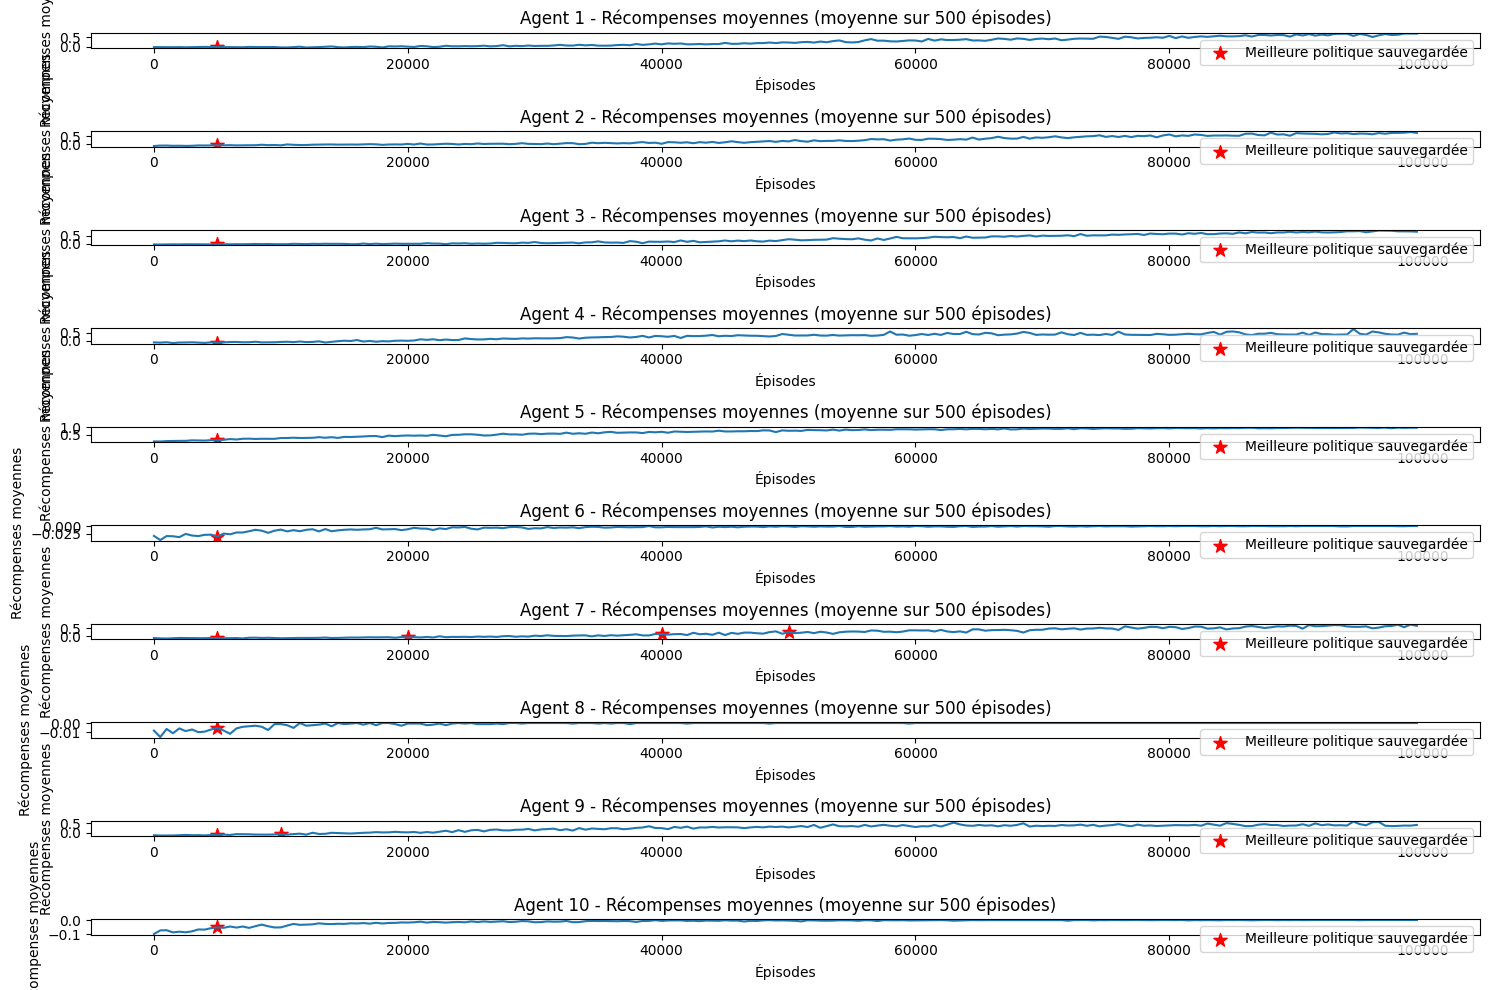


Évaluation de la meilleure politique:

Évaluation de la politique sur 100 épisodes...

Résultats de l'évaluation:
Agent 1:
  - Taux de réussite: 100.00%
  - Nombre moyen d'étapes (succès): 8.00
  - Récompense moyenne: 1.0000
Agent 2:
  - Taux de réussite: 100.00%
  - Nombre moyen d'étapes (succès): 12.00
  - Récompense moyenne: 1.0000
Agent 3:
  - Taux de réussite: 100.00%
  - Nombre moyen d'étapes (succès): 9.00
  - Récompense moyenne: 1.0000
Agent 4:
  - Taux de réussite: 100.00%
  - Nombre moyen d'étapes (succès): 4.00
  - Récompense moyenne: 0.4000
Agent 5:
  - Taux de réussite: 100.00%
  - Nombre moyen d'étapes (succès): 3.00
  - Récompense moyenne: 1.0000
Agent 6:
  - Taux de réussite: 0.00%
  - Nombre moyen d'étapes (succès): N/A (aucun succès)
  - Récompense moyenne: 0.0000
Agent 7:
  - Taux de réussite: 100.00%
  - Nombre moyen d'étapes (succès): 6.00
  - Récompense moyenne: 1.0000
Agent 8:
  - Taux de réussite: 0.00%
  - Nombre moyen d'étapes (succès): N/A (aucun succès)
  -

In [ ]:
# Independent Q-learning parameters
env.reset()
learning_rate_iql = 0.5
max_episodes_iql = 100000
discount_factor_iql = 0.99
exploration_rate_iql = 1.0
min_exploration_rate_iql = 0.05
exploration_decay_iql = 0.99997
window_size_iql = int(max_episodes_iql/200)

# Run independent Q-learning
iql, iql_results = test_independent_learning(
    env=env,
    n_agents=n_agents,
    learning_rate=learning_rate_iql,
    discount_factor=discount_factor_iql,
    exploration_rate=exploration_rate_iql,
    min_exploration_rate=min_exploration_rate_iql,
    exploration_decay=exploration_decay_iql,
    max_episodes=max_episodes_iql,
    window_size=window_size_iql,
    eval_frequency=int(max_episodes_iql/20)
    
)

Environnement initial:
A H . . . H .
. . H A A . H
. . H H H A H
H A . A . . H
. A A . . H A
. . H . H . .
G H . . . . A


Début de l'entraînement avec alternance...


 10%|█         | 20072/200000 [00:58<04:27, 673.24it/s]

Épisode 20000/200000, Récompenses moyennes agents: ['0.00', '0.00', '0.00', '0.55', '0.73', '0.00', '0.23', '0.00', '0.40', '0.00'], Agent actif: 0, Taux d'apprentissage: ['0.4000', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400']Epsilon:0.36787024399384166total _reward1.9000000000000001


 20%|██        | 40017/200000 [02:35<16:27, 161.95it/s] 

Épisode 40000/200000, Récompenses moyennes agents: ['0.00', '-0.01', '0.00', '0.75', '0.86', '0.00', '0.68', '0.00', '0.64', '-0.01'], Agent actif: 0, Taux d'apprentissage: ['0.4000', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400']Epsilon:0.1353285164160905total _reward2.922


 30%|███       | 60055/200000 [03:34<04:41, 497.12it/s]

Épisode 60000/200000, Récompenses moyennes agents: ['0.00', '0.00', '0.00', '0.83', '0.96', '0.00', '0.84', '0.00', '0.91', '0.00'], Agent actif: 0, Taux d'apprentissage: ['0.4000', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400']Epsilon:0.05total _reward3.554


 40%|████      | 80083/200000 [04:04<02:48, 711.65it/s] 

Épisode 80000/200000, Récompenses moyennes agents: ['0.00', '0.00', '0.00', '0.88', '0.99', '0.00', '0.86', '0.00', '0.90', '0.00'], Agent actif: 0, Taux d'apprentissage: ['0.4000', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400']Epsilon:0.05total _reward3.638


 50%|█████     | 100085/200000 [04:33<02:25, 687.91it/s]

Épisode 100000/200000, Récompenses moyennes agents: ['0.00', '0.00', '0.00', '0.77', '0.92', '0.00', '0.76', '0.00', '0.92', '0.00'], Agent actif: 0, Taux d'apprentissage: ['0.4000', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400']Epsilon:0.05total _reward3.364


 60%|██████    | 120063/200000 [05:09<03:22, 394.69it/s] 

Épisode 120000/200000, Récompenses moyennes agents: ['0.00', '0.00', '0.00', '0.88', '0.99', '0.00', '0.89', '0.00', '0.94', '0.00'], Agent actif: 0, Taux d'apprentissage: ['0.4000', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400']Epsilon:0.05total _reward3.704


 70%|███████   | 140043/200000 [05:51<05:21, 186.30it/s]

Épisode 140000/200000, Récompenses moyennes agents: ['0.00', '0.00', '0.00', '0.91', '0.97', '0.00', '0.88', '0.00', '0.91', '0.00'], Agent actif: 0, Taux d'apprentissage: ['0.4000', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400']Epsilon:0.05total _reward3.6839999999999997


 80%|████████  | 160085/200000 [06:44<01:00, 659.79it/s]

Épisode 160000/200000, Récompenses moyennes agents: ['0.00', '0.00', '0.00', '0.84', '0.98', '0.00', '0.84', '0.00', '0.85', '0.00'], Agent actif: 0, Taux d'apprentissage: ['0.4000', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400']Epsilon:0.05total _reward3.512


 90%|█████████ | 180055/200000 [07:28<00:49, 403.46it/s]

Épisode 180000/200000, Récompenses moyennes agents: ['0.00', '0.00', '-0.00', '0.81', '0.98', '-0.00', '0.88', '0.00', '0.91', '0.00'], Agent actif: 0, Taux d'apprentissage: ['0.4000', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400']Epsilon:0.05total _reward3.5599999999999996


100%|██████████| 200000/200000 [08:12<00:00, 406.07it/s] 


Épisode 200000/200000, Récompenses moyennes agents: ['0.00', '0.00', '0.00', '0.85', '1.00', '0.00', '0.82', '0.00', '0.93', '0.00'], Agent actif: 0, Taux d'apprentissage: ['0.4000', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400']Epsilon:0.05total _reward3.5940000000000003

Politique de l'agent 1:
 →  ←  ←  ←  ←  ←  ← 
 ↑  →  ←  ←  ←  ←  ← 
 ↓  →  ←  ←  ←  ←  ← 
 ←  ←  ↓  ↓  ←  ←  ← 
 ↓  ↓  →  ←  ←  ←  ← 
 ↓  ←  ←  ←  ←  ←  ← 
 ←  ←  ←  ←  ←  ←  ← 

Politique de l'agent 2:
 ←  ←  ←  ←  ←  ←  ← 
 ←  ←  ←  ←  ←  ←  ← 
 ←  ←  ←  ←  ←  ←  ← 
 ←  ←  ←  ←  ←  ←  ← 
 ←  ↓  ↓  ↓  ←  ←  ← 
 ↓  ←  ←  ←  ←  ←  ← 
 ←  ←  ←  →  ↑  ←  ← 

Politique de l'agent 3:
 ←  ←  ←  ←  →  ←  ← 
 ←  ←  ←  ←  ↓  →  ← 
 ←  ←  ←  ←  ←  ←  ← 
 ←  ↓  ←  →  ↑  ↓  ← 
 ↓  ↓  ←  ↓  ↓  ←  ← 
 ↓  ←  ←  ←  ←  ←  ← 
 ←  ←  ←  ↓  ←  ←  ← 

Politique de l'agent 4:
 ↑  ←  ←  ←  ←  ←  ← 
 ↓  ↓  ←  ←  ←  ←  ← 
 →  ↓  ←  ←  ←  ↓  ← 
 ←  →  →  ↓  ←  ↑  ← 
 ↓  ←  ←  ←  ←  ←  ← 
 ↓  ←  ←  ↑ 

c:\Users\HP\side project ml\MARL\MARL-project\algo\IQL_CQL.py:1162: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\HP\side project ml\MARL\MARL-project\algo\IQL_CQL.py:1162: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()
c:\Users\HP\side project ml\MARL\MARL-project\algo\IQL_CQL.py:1164: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(plot_filename)
c:\Users\HP\side project ml\MARL\MARL-project\marlenv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


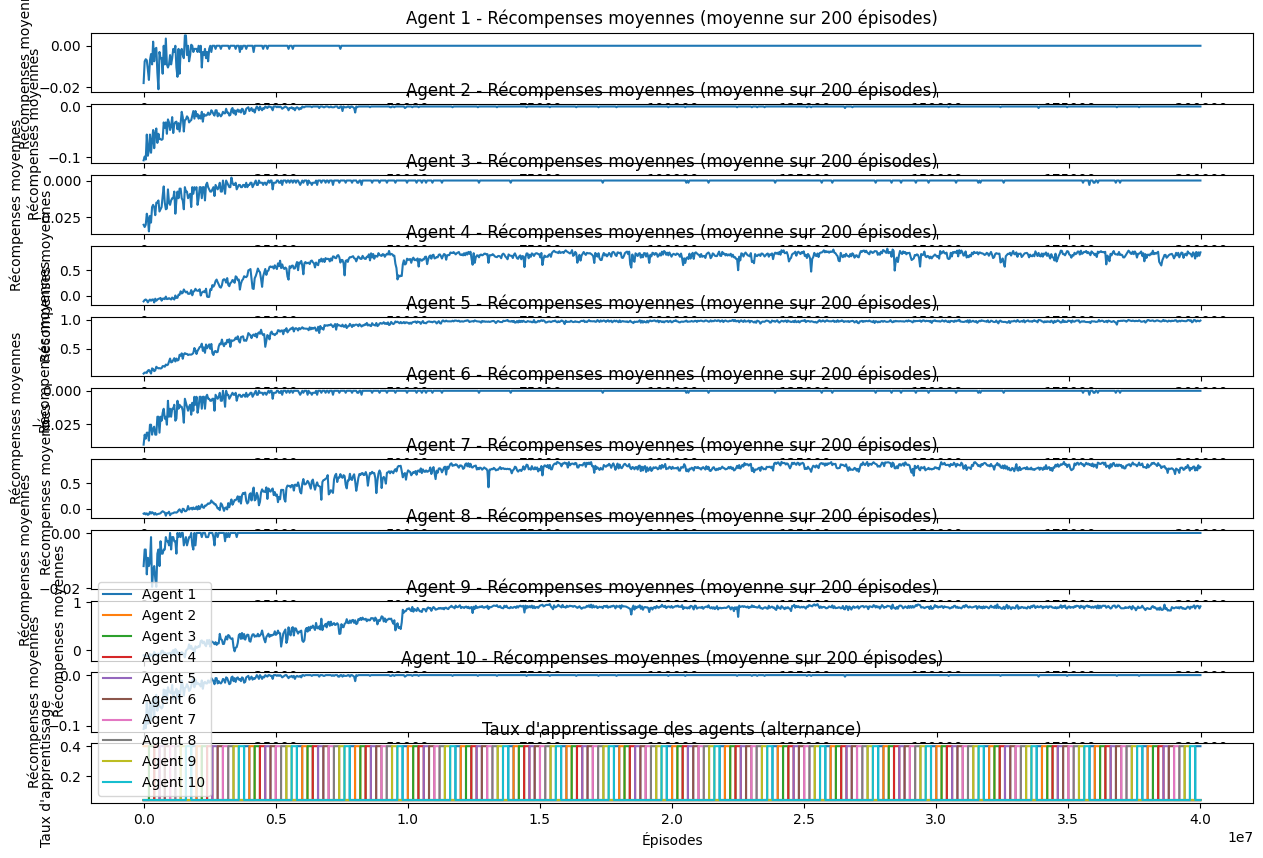

Test de la politique obtenue

Tous les résultats ont été sauvegardés dans le dossier 'results', avec le fichier principal: results/alternating_learning_20250315_003300.txt


In [ ]:
env.reset()
alt_agent, alt_results = test_alternating_learning(
    env, n_agents=10,
    base_learning_rate=0.4,
    max_episodes=200000,
    discount_factor=0.99,
    exploration_rate=1.0,
    min_exploration_rate=0.05,
    exploration_decay=0.99995,
    alternating_period=1000,
    learning_rate_ratio=0.1,
    window_size=200)

In [ ]:
visualize_policy_iql_with_images(env,iql,2)


=== Test Episode 1 ===


error: display Surface quit

# modified reward 


In [ ]:
from goals_env_4 import FrozenLake4goals
n_agents = 4
env=FrozenLake4goals( num_agents=4, grid_size=(8, 8), slip_prob=0., hole_prob=0.2, seed=4, 
                 collaboration_bonus=0, collision_penalty=0)
env.render()

G H . . . . . G
. . . . . . . .
. H . . . . . .
. . H H . . A .
. . . H . . H .
. . H . . H . A
. A . A H . . H
G . . H H . . G



Environnement initial:
G H . . . . . G
. . . . . . . .
. H . . . . . .
. . H H . . A .
. . . H . . H .
. . H . . H . A
. A . A H . . H
G . . H H . . G


Début de l'entraînement centralisé...


 10%|█         | 10071/100000 [00:11<02:57, 507.49it/s]

Épisode 10000/100000, Récompenses moyennes agents: ['0.00', '0.00', '0.00', '0.00'], Epsilon: 0.9608


 20%|██        | 20064/100000 [00:24<02:29, 535.45it/s] 

Épisode 20000/100000, Récompenses moyennes agents: ['0.00', '0.00', '0.00', '0.00'], Epsilon: 0.9231


 30%|███       | 30171/100000 [00:39<01:08, 1017.15it/s]

Épisode 30000/100000, Récompenses moyennes agents: ['0.00', '0.00', '0.00', '0.00'], Epsilon: 0.8869


 40%|████      | 40086/100000 [00:49<00:57, 1044.73it/s]

Épisode 40000/100000, Récompenses moyennes agents: ['0.00', '0.00', '0.00', '0.00'], Epsilon: 0.8521


 50%|█████     | 50148/100000 [00:59<00:44, 1123.81it/s]

Épisode 50000/100000, Récompenses moyennes agents: ['0.00', '0.00', '0.00', '0.00'], Epsilon: 0.8187


 60%|██████    | 60136/100000 [01:15<01:00, 659.12it/s] 

Épisode 60000/100000, Récompenses moyennes agents: ['0.00', '0.00', '0.00', '0.00'], Epsilon: 0.7866


 70%|███████   | 70115/100000 [01:26<00:32, 908.74it/s] 

Épisode 70000/100000, Récompenses moyennes agents: ['0.00', '0.00', '0.00', '0.00'], Epsilon: 0.7558


 80%|████████  | 80167/100000 [01:34<00:15, 1274.96it/s]

Épisode 80000/100000, Récompenses moyennes agents: ['0.00', '0.00', '0.00', '0.00'], Epsilon: 0.7261


 90%|█████████ | 90139/100000 [01:43<00:08, 1222.27it/s]

Épisode 90000/100000, Récompenses moyennes agents: ['0.00', '0.00', '0.00', '0.00'], Epsilon: 0.6977


100%|██████████| 100000/100000 [01:52<00:00, 891.39it/s]


Épisode 100000/100000, Récompenses moyennes agents: ['0.00', '0.00', '0.00', '0.00'], Epsilon: 0.6703

Politique centralisée apprise:
Politique centralisée:
Nombre d'états visités: 72792
Nombre d'entrées Q non nulles: 63363
Valeur Q moyenne: 0.1100
Valeur Q maximale: 200.0000
Valeur Q minimale (non-nulle): 0.0002


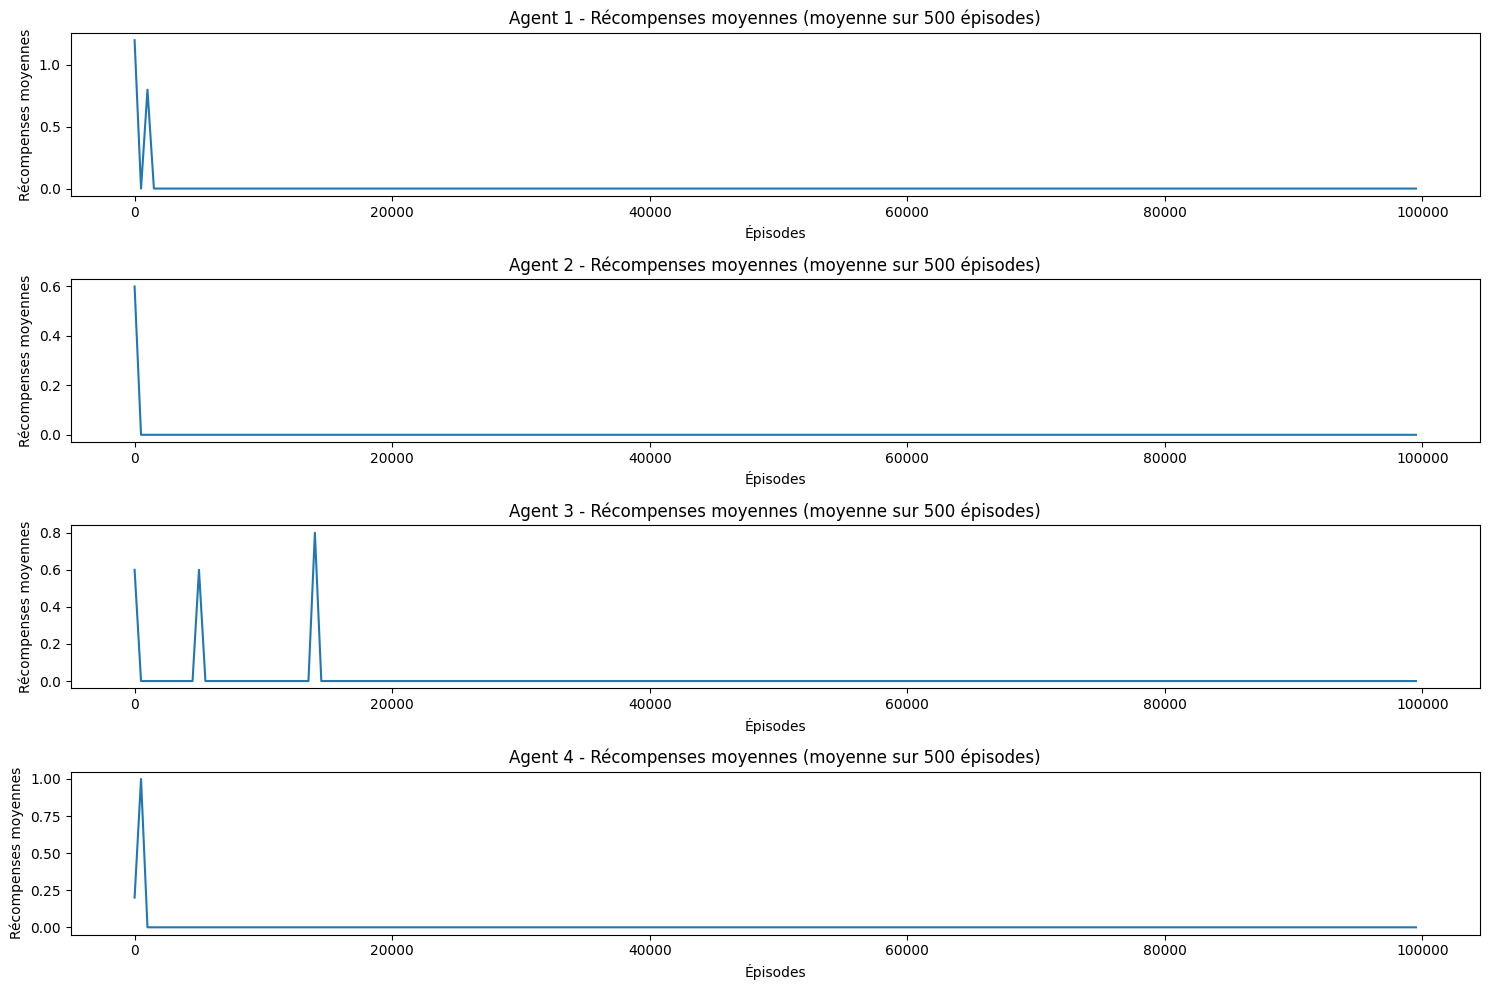

Test de la politique obtenue

Évaluation de la politique sur 1000 épisodes...

Résultats de l'évaluation:
Agent 1:
  - Taux de réussite: 0.00%
  - Nombre moyen d'étapes (succès): N/A (aucun succès)
  - Récompense moyenne: 0.0000
Agent 2:
  - Taux de réussite: 0.00%
  - Nombre moyen d'étapes (succès): N/A (aucun succès)
  - Récompense moyenne: 0.0000
Agent 3:
  - Taux de réussite: 0.00%
  - Nombre moyen d'étapes (succès): N/A (aucun succès)
  - Récompense moyenne: 0.0000
Agent 4:
  - Taux de réussite: 0.00%
  - Nombre moyen d'étapes (succès): N/A (aucun succès)
  - Récompense moyenne: 0.0000

Taux de collaboration: 0.00%

Tous les résultats ont été sauvegardés dans le dossier 'results', avec le fichier principal: results/centralized_learning_20250319_134220.txt


In [ ]:
env.reset()
learning_rate_cql = 0.5
max_episodes_cql = 100000
discount_factor_cql = 0.99
exploration_rate_cql = 1.0
min_exploration_rate_cql = 0.05
exploration_decay_cql = 0.99996
window_size_cql = int(max_episodes_cql/200)

# Run centralized Q-learning
cql, cql_results = test_centralized_learning(
    env=env,
    n_agents=n_agents,
    learning_rate=learning_rate_cql,
    discount_factor=discount_factor_cql,
    exploration_rate=exploration_rate_cql,
    min_exploration_rate=min_exploration_rate_cql,
    exploration_decay=exploration_decay_cql,
    max_episodes=max_episodes_cql,
    window_size=window_size_cql
)

. . . A
. . . .
. . . G
A . . .

Environnement initial:
. . . A
. . . .
. . . G
A . . .


Début de l'entraînement indépendant...


Épisode 10000/100000, Récompenses moyennes agents: ['0.94', '0.98'], Epsilon: 0.7408


Épisode 20000/100000, Récompenses moyennes agents: ['0.97', '1.01'], Epsilon: 0.5488


Épisode 30000/100000, Récompenses moyennes agents: ['1.00', '1.02'], Epsilon: 0.4066


Épisode 40000/100000, Récompenses moyennes agents: ['1.04', '1.01'], Epsilon: 0.3012


Épisode 50000/100000, Récompenses moyennes agents: ['1.02', '1.02'], Epsilon: 0.2231


Épisode 60000/100000, Récompenses moyennes agents: ['1.05', '1.05'], Epsilon: 0.1653


Épisode 70000/100000, Récompenses moyennes agents: ['1.13', '1.13'], Epsilon: 0.1225


Épisode 80000/100000, Récompenses moyennes agents: ['1.07', '1.07'], Epsilon: 0.0907


Épisode 90000/100000, Récompenses moyennes agents: ['1.07', '1.07'], Epsilon: 0.0672


100%|██████████| 100000/100000 [01:14<00:00, 1340.59it/s]


Épisode 100000/100000, Récompenses moyennes agents: ['1.24', '1.24'], Epsilon: 0.0500

Politiques indépendantes apprises:

Politique de l'agent 1:
 →  →  ↑  ↓ 
 ↓  →  ↓  ← 
 →  ↓  →  o 
 →  ↑  ↑  ↑ 

Politique de l'agent 2:
 ↓  →  ↓  ↓ 
 ↓  →  ↓  ↓ 
 →  →  →  o 
 ↑  ↑  ↑  ↑ 


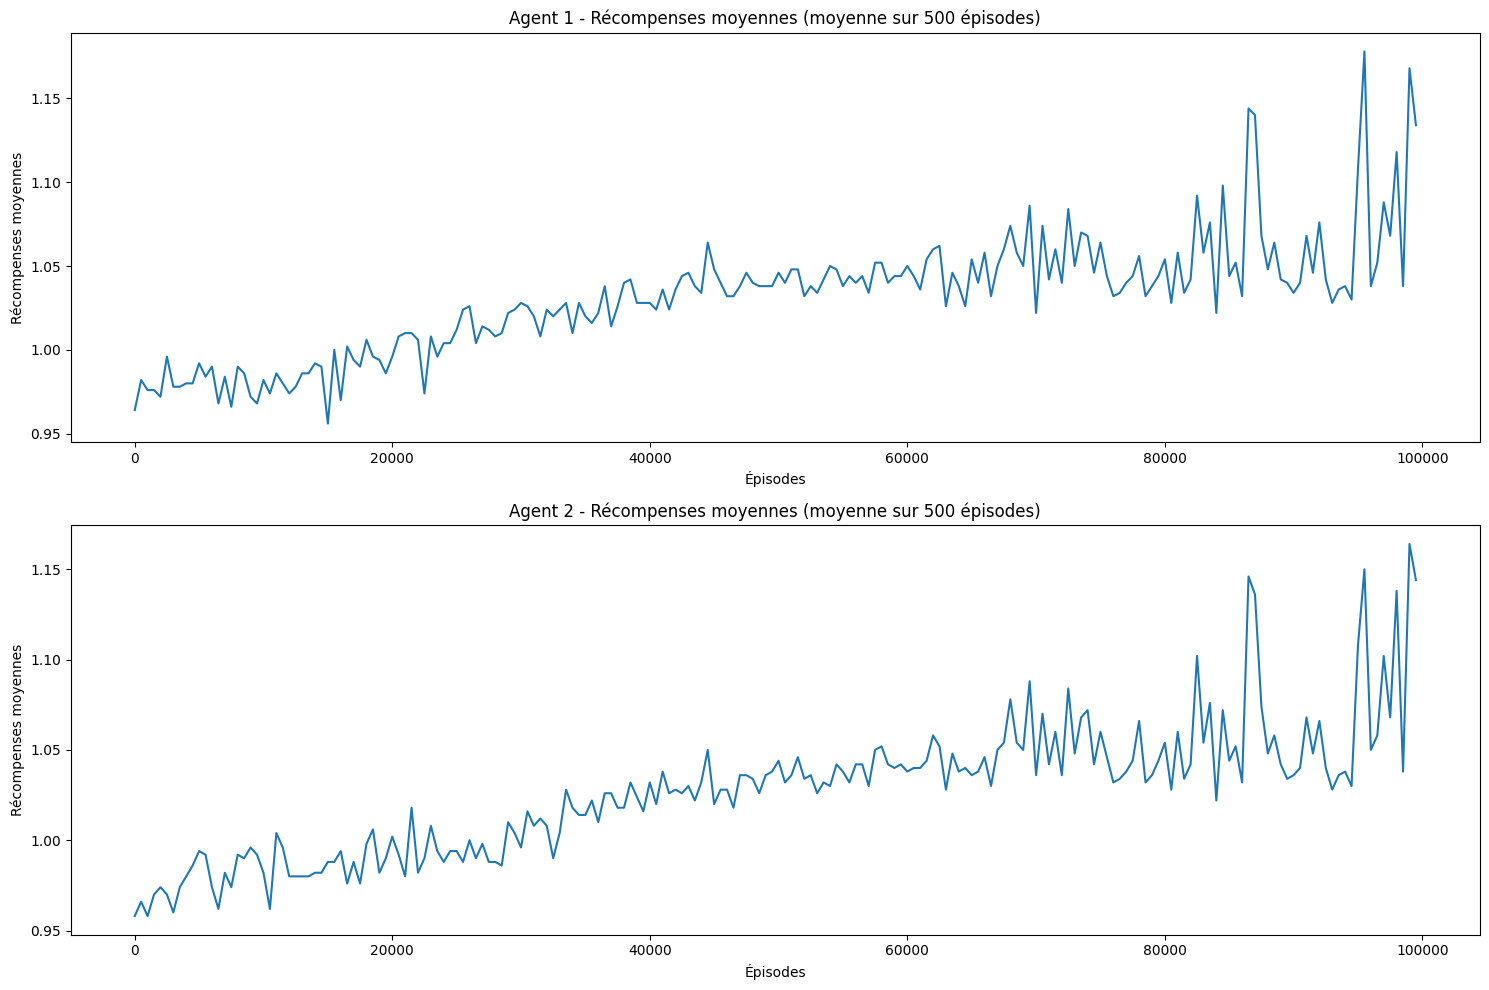

Test de la politique obtenue - Récompenses uniquement
Agent 1: Récompense moyenne = 0.0000 ± 0.0000
Agent 2: Récompense moyenne = 0.0000 ± 0.0000

Tous les résultats ont été sauvegardés dans le dossier 'results', avec le fichier principal: results/independent_q_learning_20250322_120502.txt
Environnement initial:
. . . A
. . . .
. . . G
A . . .


Début de l'entraînement centralisé...


Épisode 10000/100000, Récompenses moyennes agents: ['1.46', '1.46'], Epsilon: 0.6065


 10%|█         | 10376/100000 [00:12<00:48, 1855.61it/s]

Épisode 20000/100000, Récompenses moyennes agents: ['1.79', '1.79'], Epsilon: 0.3679


Épisode 30000/100000, Récompenses moyennes agents: ['1.87', '1.87'], Epsilon: 0.2231


Épisode 40000/100000, Récompenses moyennes agents: ['1.96', '1.96'], Epsilon: 0.1353


Épisode 50000/100000, Récompenses moyennes agents: ['1.98', '1.98'], Epsilon: 0.0821


 51%|█████     | 51125/100000 [00:21<00:09, 5402.81it/s]

Épisode 60000/100000, Récompenses moyennes agents: ['1.99', '1.99'], Epsilon: 0.0500


Épisode 70000/100000, Récompenses moyennes agents: ['2.00', '2.00'], Epsilon: 0.0500


Épisode 80000/100000, Récompenses moyennes agents: ['1.99', '1.99'], Epsilon: 0.0500


Épisode 90000/100000, Récompenses moyennes agents: ['1.99', '1.99'], Epsilon: 0.0500


100%|██████████| 100000/100000 [00:31<00:00, 3187.78it/s]


Épisode 100000/100000, Récompenses moyennes agents: ['1.99', '1.99'], Epsilon: 0.0500

Politique centralisée apprise:
Politique centralisée:
Nombre d'états visités: 255
Nombre d'entrées Q non nulles: 4048
Valeur Q moyenne: 3.0592
Valeur Q maximale: 4.0000
Valeur Q minimale (non-nulle): 0.0193


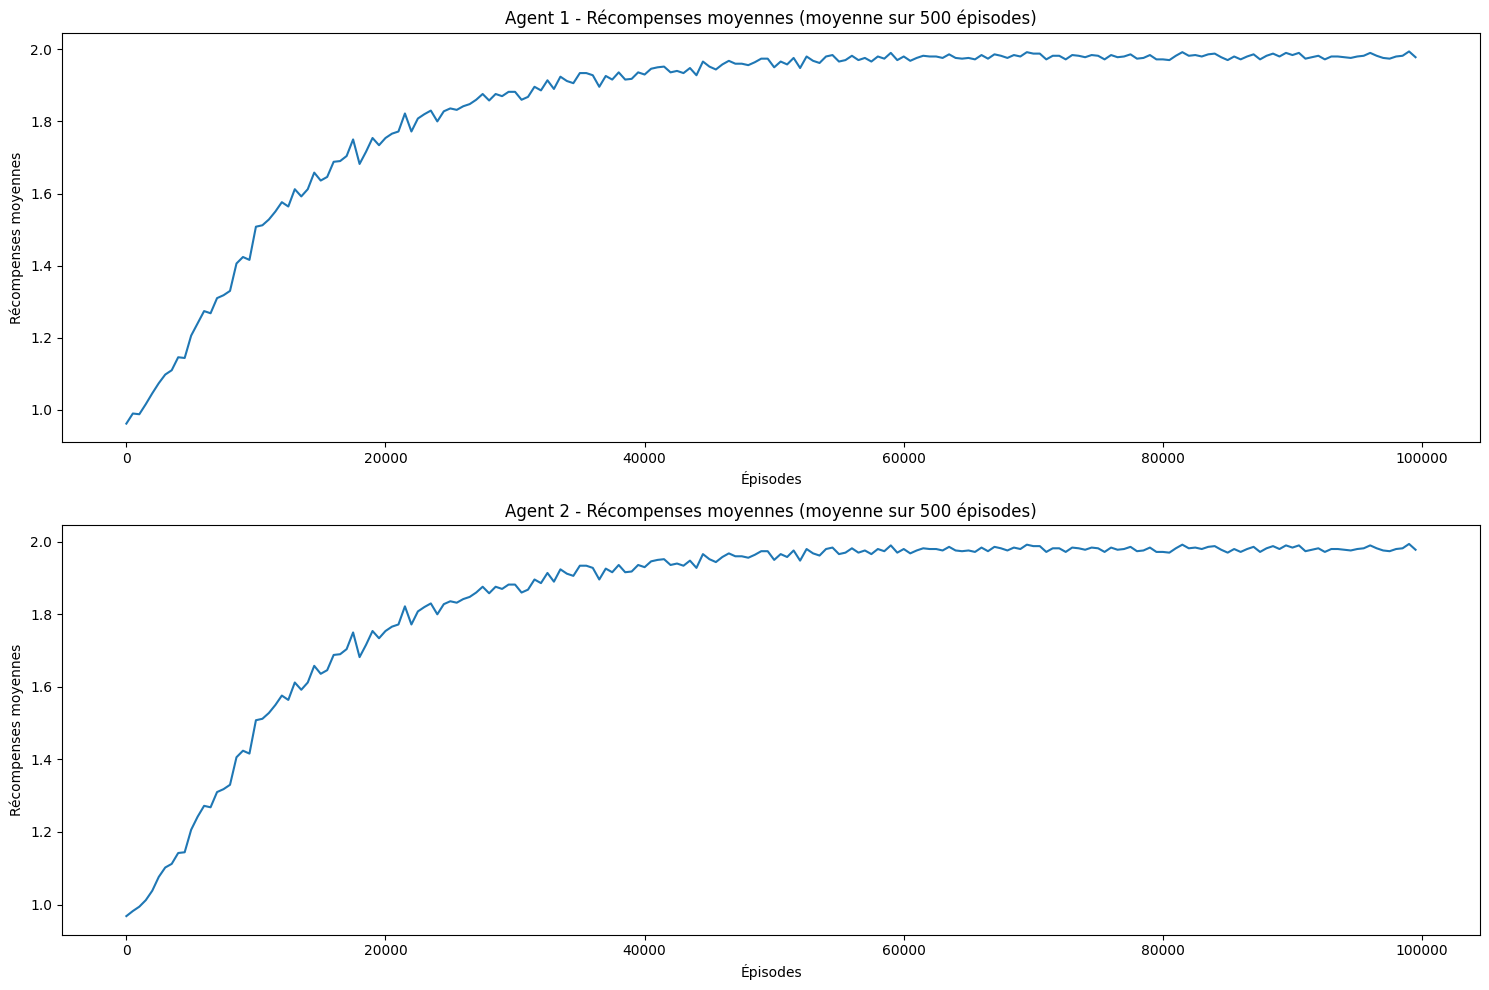

Test de la politique obtenue

Évaluation de la politique sur 1000 épisodes...

Résultats de l'évaluation:
Agent 1:
  - Taux de réussite: 100.00%
  - Nombre moyen d'étapes (succès): 4.00
  - Récompense moyenne: 2.0000
Agent 2:
  - Taux de réussite: 100.00%
  - Nombre moyen d'étapes (succès): 4.00
  - Récompense moyenne: 2.0000

Taux de collaboration: 100.00%

Tous les résultats ont été sauvegardés dans le dossier 'results', avec le fichier principal: results/centralized_learning_20250322_120619.txt


In [ ]:
from multi_agent_frozen import FrozenLakeFlexibleAgentsEnvCol
from goals_env_4 import FrozenLake4goals
from IQL_CQL import test_independent_q_learning,IndependentQLearning,CentralizedQLearning,test_centralized_learning
from test_collab_reward import visualize_policy_pygame

def create_map_from_string(map_string, env_type="flexible"):
    """
    Create a map configuration from a string representation.
    
    The string uses the following symbols:
    'F' or '.' - Frozen surface (normal tile)
    'H' or 'h' - Hole
    'G' or 'g' - Goal
    'A' or 'a' - Agent start position (multiple allowed)
    '/' - Row separator
    
    Args:
        map_string: String representation of the map
        env_type: Type of environment to create ('flexible' or '4goals')
    
    Returns:
        An instance of the requested environment with the specified map
    """
    # Split the string into rows
    rows = map_string.strip().split('/')
    
    # Determine grid size
    height = len(rows)
    width = max(len(row) for row in rows)
    
    # Normalize row lengths
    normalized_rows = [row.ljust(width, '.') for row in rows]
    
    # Map tiles
    holes = []
    goals = []
    agent_starts = []
    
    # Parse the map
    for i, row in enumerate(normalized_rows):
        for j, cell in enumerate(row):
            if cell in 'Hh':
                holes.append((i, j))
            elif cell in 'Gg':
                goals.append((i, j))
            elif cell in 'Aa':
                agent_starts.append((i, j))
    
    # Create the environment based on the type
    if env_type.lower() == "flexible":
        # For FrozenLakeFlexibleAgentsEnvCol, set a single goal
        goal_pos = goals[0] if goals else None
        num_agents = len(agent_starts)
        
        env = FrozenLakeFlexibleAgentsEnvCol(
            num_agents=num_agents,
            grid_size=(height, width),
            slip_prob=0.0,  # Can be customized
            hole_prob=0.0,  # We'll set holes manually
            seed=None,
            collaboration_bonus=1.0,
            collision_penalty=0.0
        )
        
        # Override the default hole positions and goal
        env.holes = set(holes)
        env.goal_pos = goal_pos
        
        # Set custom agent start positions
        env.agent_starts = agent_starts
        
    elif env_type.lower() == "4goals":
        # For FrozenLake4goals
        num_agents = len(agent_starts)
        
        env = FrozenLake4goals(
            num_agents=num_agents,
            grid_size=(height, width),
            slip_prob=0.0,  # Can be customized
            hole_prob=0.0,  # We'll set holes manually
            seed=None,
            collaboration_bonus=1.0,
            collision_penalty=0.3
        )
        
        # Override the default hole positions
        env.holes = set(holes)
        
        # Set custom goal positions (up to 4)
        if goals:
            env.goal_positions = goals[:4]
        
        # Set custom agent start positions
        env.agent_starts = agent_starts
    
    # Reset the environment to apply changes
    env.reset()
    
    return env


# Example usage
if __name__ == "__main__":
    n_agents=2
    CQL=True
    IQL=True
    # Example map string for FrozenLakeFlexibleAgentsEnvCol
    # A = agent start, G = goal, H = hole, . or F = frozen surface
    flexible_map = "....H..A/A...H.../...H..../.....H../...H..../HHH...H./.H..H.H./...H...G"
    flexible_map = "....H.../A...H.../...H..../.....H../...H..../HHH...H./.H..H.H./...H...G"
    flexible_map = "...A/..../...G/A..." 
 
    
    
    # Create environments from the maps
    env = create_map_from_string(flexible_map, "flexible")
    env.render()
    env.reset()

    if IQL:
        learning_rate_iql = 0.5
        max_episodes_iql = 100000
        discount_factor_iql = 0.99
        exploration_rate_iql = 1.0
        min_exploration_rate_iql = 0.05
        exploration_decay_iql = 0.99997
        window_size_iql = int(max_episodes_iql/200)
        env.reset()
        # Run independent Q-learning
        iql, iql_results = test_independent_q_learning(
            env=env,
            n_agents=n_agents,
            learning_rate=learning_rate_iql,
            discount_factor=discount_factor_iql,
            exploration_rate=exploration_rate_iql,
            min_exploration_rate=min_exploration_rate_iql,
            exploration_decay=exploration_decay_iql,
            max_episodes=max_episodes_iql,
            window_size=window_size_iql,
            
        )
    if CQL:
        env.reset()
        learning_rate = 0.4
        max_episodes=100000
        discount_factor = 0.99
        
        exploration_rate = 1.0
        min_exploration_rate = 0.05
        exploration_decay = 0.99995
        window_size=int(max_episodes/200)
        cql,results=test_centralized_learning(env,n_agents=2,
                                            learning_rate=learning_rate,
                discount_factor=discount_factor,
                exploration_rate=exploration_rate,
                min_exploration_rate=min_exploration_rate,
                exploration_decay=exploration_decay,
                max_episodes=max_episodes,
                window_size=window_size)
   
        
  


In [ ]:
env.reset()
env.render()
print(['←', '↓', '→', '↑'])
        

. . . . H . . A
A . . . H . . .
. . . H . . . .
. . . . . H . .
. . . H . . . .
H H H . . . H .
. H . . H . H .
. . . H . . . G

['←', '↓', '→', '↑']


In [ ]:
action=[1,1]
next_state_tuple, reward_list, done_list, truncated_list, _ = env.step(action)
print(reward_list)
env.render()

[2.0, 2.0]
. . . . H . . .
. . . . H . . .
. . . H . . . .
. . . . . H . .
. . . H . . . .
H H H . . . H .
. H . . H . H .
. . . H . . . C



In [ ]:
env.agent_positions

[(5, 7), (5, 7)]